<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Optimizers in Gradient Descent**


Estimated time needed: **45** minutes


Suppose you are given a classification task of determining if a food item is healthy or not. This task would bring a lot of values to people who need diet management such as diabetic patients.


Each food item has nutrition information per serving such as its carbohydrates, fat, fibers, vitamins, etc. We know that for unhealthy food items such as fried chicken, we should choose less frequently in our daily diet and for healthy food items such as salad without sauce, we should chooose them more often in our diet. Now given the complexity of the problem, you plan to use Neural Networks to classify those food items.


However, the first neural network you trained had pretty bad performance and essentially underfits the dataset. As a data scientist, you know the performance may be caused by many factors such as bad data quality, architecture of your neural network, non-optimized hyperparameter tuning, etc. So you tried them all and the model result still looks pretty bad. 


Then how to improve its performance, in this lab, you will see different optimizers could also play a big role in neural network training process.


## Objectives


After completing this lab you will be able to:


* Explain several popular optimizers
* Evaluate their performance in a real-world classification scenario
* (Optional)Implement adam optimizer from scrach


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

%matplotlib inline

2024-08-16 08:13:39.642562: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-16 08:13:40.017305: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-16 08:13:40.827682: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-16 08:13:44.006944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import warnings
warnings.simplefilter('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

### Load and explore the dataset


In [4]:
food_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/datasets/food_items.csv")

In [5]:
food_df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


In [6]:
Y_COLUMN = 'class'
RANDOM_STATE = 123

In [7]:
food_df[Y_COLUMN].value_counts(normalize=True)

class
'In Moderation'    0.501433
'Less Often'       0.423906
'More Often'       0.074661
Name: proportion, dtype: float64

<Axes: xlabel='class'>

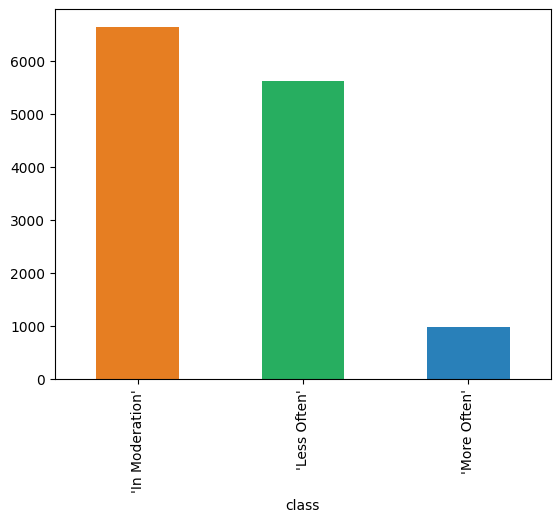

In [8]:
food_df[Y_COLUMN].value_counts().plot.bar(color=['#e67e22', '#27ae60', '#2980b9'])

## Data processing


In [9]:
X = food_df.drop(Y_COLUMN, axis=1)
y = food_df[Y_COLUMN]

In [10]:
ms = MinMaxScaler()

In [11]:
X = ms.fit_transform(X)

In [12]:
label_encoder = LabelEncoder()

In [14]:
y = label_encoder.fit_transform(y.values.ravel())